<a href="https://colab.research.google.com/github/ClaudiaGonzalezScanu/aprendiendo_python/blob/main/Clase_Lunes20_11_21_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerías y funciones necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Generamos datos aleatorios 2D para tres clusters y los representamos

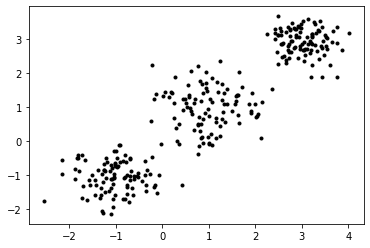

In [ ]:
np.random.seed(7)
x1 = np.random.standard_normal((100,2))*0.6+np.ones((100,2))
x2 = np.random.standard_normal((100,2))*0.5-np.ones((100,2))
x3 = np.random.standard_normal((100,2))*0.4-2*np.ones((100,2))+5
X = np.concatenate((x1,x2,x3),axis=0)
plt.plot(X[:,0],X[:,1],'k.')
plt.show()


Agrupamos los puntos con k-means usando k=3

In [ ]:
from sklearn.cluster import KMeans
n = 3
k_means = KMeans(n_clusters=n)
k_means.fit(X)


KMeans(n_clusters=3)

El resultado son tres centroides en torno a los cuales se agrupan los puntos y las etiquetas para cada punto que indican a qué cluster pertenece dicho punto

In [ ]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

Dibujamos ahora los puntos y los centroides, utilizando un color distinto para los puntos de cada cluster:

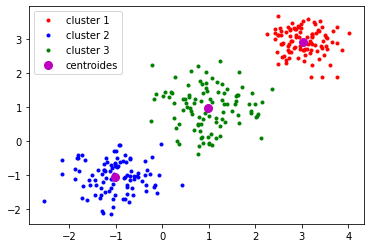

In [ ]:
plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'g.', label='cluster 3')
plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')
plt.legend(loc='best')
plt.show()


**Métricas de evaluación para Clustering**

El método de Elbow consiste básicamente en verificar la evolución de la suma de los cuadrados del error para varios valores de K y verificar cual es el que brinda un mejor agrupamiento. 

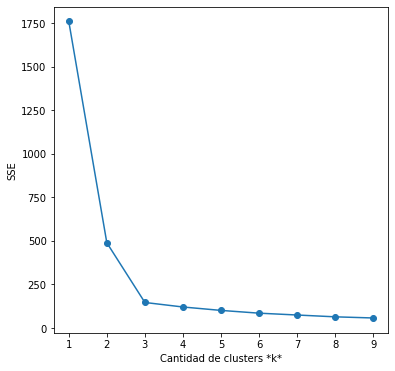

In [ ]:
# Corro el algoritmo con K entre 1 y 9 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('SSE');

Por otro lado, el Índice de Silueta, como vimos en la clase teórica, indica si existen o no, estructuras en los datos.
A continuación graficamos el índice de silueta para 2<=k<=4:


In [ ]:
from sklearn.metrics import silhouette_score

list_k = list(range(2, 5))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.578760669258253
For n_clusters =3 silhouette score is 0.6716165871930339
For n_clusters =4 silhouette score is 0.594952780760309


Y podemos graficar el gráfico de silueta, por ejemplo, para k=3:

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe309882850>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=0))

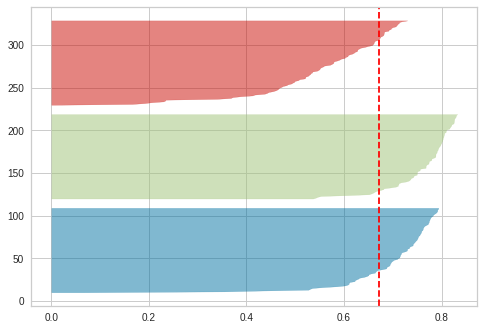

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Genero un modelo con K=3
model = KMeans(3, random_state=0)

# Ploteo el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(X)      

**Utilizando el modelo para agrupar instancias nuevas**

A partir del modelo generado, podríamos darle un nuevo caso y agruparlo en uno de los clusters generados:

In [ ]:
ejemplos=[]
ejemplos.append(X[27,:])
ejemplos.append(X[71,:])
ejemplos.append(X[144,:])

print("El ejemplo " + str(ejemplos[0]) + " corresponde al cluster " + str(model.predict(ejemplos)[0]))
print("El ejemplo " + str(ejemplos[1]) + " corresponde al cluster " + str(model.predict(ejemplos)[1]))
print("El ejemplo " + str(ejemplos[2]) + " corresponde al cluster " + str(model.predict(ejemplos)[2]))

El ejemplo [0.92057368 0.8143142 ] corresponde al cluster 2
El ejemplo [0.68148775 0.32682257] corresponde al cluster 2
El ejemplo [-1.67068281 -0.5571396 ] corresponde al cluster 0
